In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt
### Create the Bidirectional LSTM model
from random import random
from numpy import array
from numpy import cumsum
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import LSTM
import tensorflow as tf

In [2]:
df=pd.read_csv('train-2 copy.csv',parse_dates=True)
df.head()

/Users/saismailzain/opt/anaconda3/envs/tf/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [4]:
df.shape

(1017209, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [6]:
df2=df.reindex(index=df.index[::-1])

In [7]:
df2.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017208,1115,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1


In [8]:
df2.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
4,5,5,2015-07-31,4822,559,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
0,1,5,2015-07-31,5263,555,1,1,0,1


In [9]:
atr2=df2[df2.Store==931]

In [10]:
atr2.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017025,931,2,2013-01-01,0,0,0,0,a,1
1015910,931,3,2013-01-02,3574,476,1,0,0,1
1014795,931,4,2013-01-03,3047,431,1,0,0,1
1013680,931,5,2013-01-04,2525,324,1,0,0,1
1012565,931,6,2013-01-05,2341,277,1,0,0,0


In [11]:
atr2.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
5390,931,1,2015-07-27,7024,686,1,1,0,1
4275,931,2,2015-07-28,5798,617,1,1,0,1
3160,931,3,2015-07-29,5558,662,1,1,0,1
2045,931,4,2015-07-30,5720,645,1,1,0,1
930,931,5,2015-07-31,5943,713,1,1,0,1


In [12]:
atr2.shape

(942, 9)

In [13]:
atr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 942 entries, 1017025 to 930
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Store          942 non-null    int64 
 1   DayOfWeek      942 non-null    int64 
 2   Date           942 non-null    object
 3   Sales          942 non-null    int64 
 4   Customers      942 non-null    int64 
 5   Open           942 non-null    int64 
 6   Promo          942 non-null    int64 
 7   StateHoliday   942 non-null    object
 8   SchoolHoliday  942 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 73.6+ KB


In [14]:
atr2.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,942.0,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000
mean,931.0,3.997877,3333.581741,410.285563,0.928875,0.382166,0.168790
std,0.0,1.998404,1499.644182,181.600343,0.257171,0.486175,0.374765
min,931.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,931.0,2.000000,2509.250000,307.250000,1.000000,0.000000,0.000000
50%,931.0,4.000000,3456.000000,422.000000,1.000000,0.000000,0.000000
75%,931.0,6.000000,4311.750000,523.750000,1.000000,1.000000,0.000000
max,931.0,7.000000,7372.000000,863.000000,1.000000,1.000000,1.000000


In [15]:
atr2.Sales.value_counts()

0       67
3124     4
3375     3
3277     3
4566     3
        ..
2997     1
3979     1
4091     1
3970     1
5943     1
Name: Sales, Length: 777, dtype: int64

In [16]:
atr2['Sales']=atr2['Sales'].replace(0,112)

/Users/saismailzain/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
atr2.Sales.value_counts()

112     67
3124     4
3375     3
3277     3
4566     3
        ..
2997     1
3979     1
4091     1
3970     1
5943     1
Name: Sales, Length: 777, dtype: int64

In [18]:
atr2=atr2.set_index('Date')

In [19]:
atr2.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2013-01-01,931,2,112,0,0,0,a,1
2013-01-02,931,3,3574,476,1,0,0,1
2013-01-03,931,4,3047,431,1,0,0,1
2013-01-04,931,5,2525,324,1,0,0,1
2013-01-05,931,6,2341,277,1,0,0,0


In [20]:
atr2=atr2.drop(columns=['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'])

In [21]:
atr2.head()

,Sales
Date,
2013-01-01,112
2013-01-02,3574
2013-01-03,3047
2013-01-04,2525
2013-01-05,2341


In [22]:
atr2.tail()

,Sales
Date,
2015-07-27,7024
2015-07-28,5798
2015-07-29,5558
2015-07-30,5720
2015-07-31,5943


<AxesSubplot:xlabel='Date'>

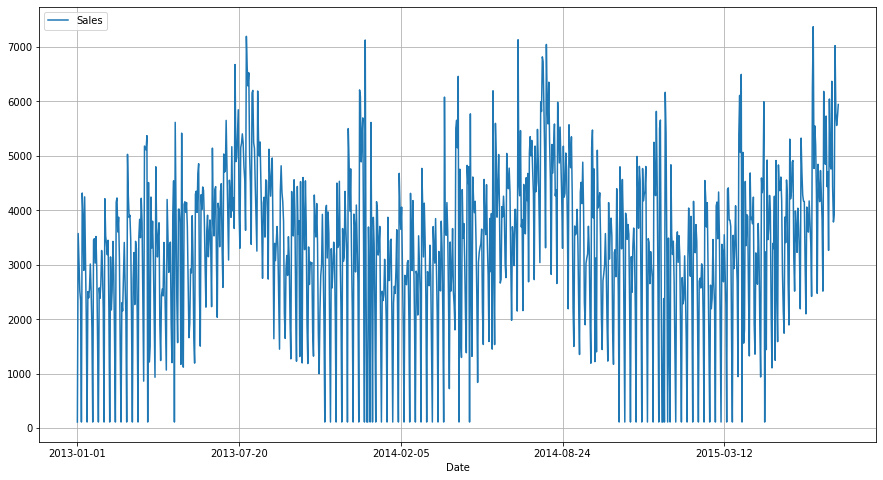

In [23]:
atr2.plot(figsize=(15,8), grid=True)

In [24]:
df1=atr2.reset_index()['Sales']

In [25]:
df1.shape

(942,)

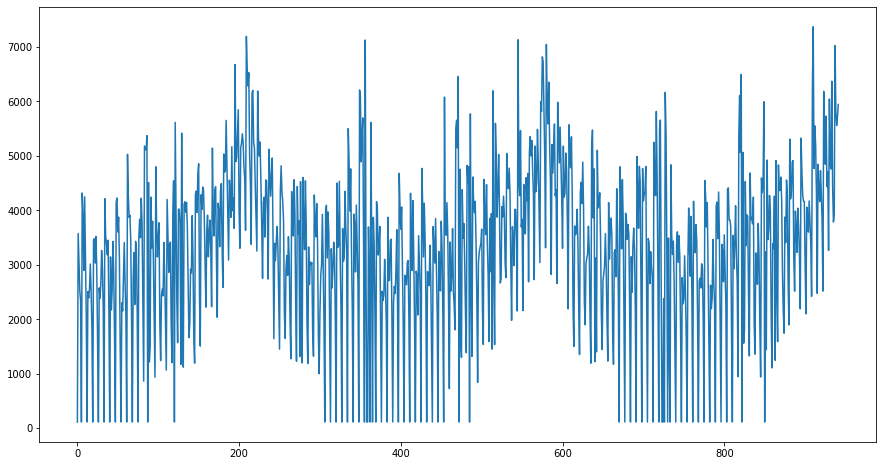

In [26]:
plt.rcParams['figure.figsize']=[15,8]
plt.plot(df1)

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0.5,1)) ## Scaling range is btw 0-1.
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [28]:
df1

array([[0.5       ],
       [0.73842975],
       [0.70213499],
       [0.66618457],
       [0.6535124 ],
       [0.5       ],
       [0.78966942],
       [0.75971074],
       [0.69187328],
       [0.78477961],
       [0.70902204],
       [0.63367769],
       [0.5       ],
       [0.6649449 ],
       [0.65702479],
       [0.66866391],
       [0.69986226],
       [0.66535813],
       [0.61887052],
       [0.5       ],
       [0.73009642],
       [0.73188705],
       [0.70103306],
       [0.73464187],
       [0.6922865 ],
       [0.60337466],
       [0.5       ],
       [0.6696281 ],
       [0.65647383],
       [0.67451791],
       [0.71694215],
       [0.69407713],
       [0.64366391],
       [0.5       ],
       [0.78243802],
       [0.73546832],
       [0.72472452],
       [0.71157025],
       [0.72988981],
       [0.6399449 ],
       [0.5       ],
       [0.70881543],
       [0.64173554],
       [0.66604683],
       [0.72844353],
       [0.68684573],
       [0.60392562],
       [0.5  

In [29]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [30]:
training_size,test_size

(612, 330)

In [31]:
print(train_data)
print('\n')
print(atr2.iloc[0:612]) #train

[[0.5       ]
 [0.73842975]
 [0.70213499]
 [0.66618457]
 [0.6535124 ]
 [0.5       ]
 [0.78966942]
 [0.75971074]
 [0.69187328]
 [0.78477961]
 [0.70902204]
 [0.63367769]
 [0.5       ]
 [0.6649449 ]
 [0.65702479]
 [0.66866391]
 [0.69986226]
 [0.66535813]
 [0.61887052]
 [0.5       ]
 [0.73009642]
 [0.73188705]
 [0.70103306]
 [0.73464187]
 [0.6922865 ]
 [0.60337466]
 [0.5       ]
 [0.6696281 ]
 [0.65647383]
 [0.67451791]
 [0.71694215]
 [0.69407713]
 [0.64366391]
 [0.5       ]
 [0.78243802]
 [0.73546832]
 [0.72472452]
 [0.71157025]
 [0.72988981]
 [0.6399449 ]
 [0.5       ]
 [0.70881543]
 [0.64173554]
 [0.66604683]
 [0.72844353]
 [0.68684573]
 [0.60392562]
 [0.5       ]
 [0.77809917]
 [0.7834022 ]
 [0.74035813]
 [0.75909091]
 [0.70626722]
 [0.59263085]
 [0.5       ]
 [0.65082645]
 [0.64056474]
 [0.68615702]
 [0.72713499]
 [0.67658402]
 [0.63519284]
 [0.5       ]
 [0.83856749]
 [0.78629477]
 [0.75874656]
 [0.76150138]
 [0.73050964]
 [0.62954545]
 [0.5       ]
 [0.67947658]
 [0.71432507]
 [0.64

In [32]:
print(test_data)
print('\n')
print(atr2.iloc[612:])  #test

[[0.78519284]
 [0.64414601]
 [0.59559229]
 [0.74793388]
 [0.7369146 ]
 [0.73953168]
 [0.76900826]
 [0.72658402]
 [0.64690083]
 [0.58539945]
 [0.79077135]
 [0.80316804]
 [0.77623967]
 [0.82865014]
 [0.76969697]
 [0.65110193]
 [0.62300275]
 [0.70055096]
 [0.70743802]
 [0.71232782]
 [0.74758953]
 [0.71756198]
 [0.63512397]
 [0.57438017]
 [0.84669421]
 [0.86935262]
 [0.75812672]
 [0.82011019]
 [0.57637741]
 [0.70743802]
 [0.5887741 ]
 [0.84373278]
 [0.7707989 ]
 [0.77596419]
 [0.7899449 ]
 [0.73443526]
 [0.63636364]
 [0.59166667]
 [0.67865014]
 [0.68753444]
 [0.69841598]
 [0.73836088]
 [0.69538567]
 [0.62775482]
 [0.57706612]
 [0.77747934]
 [0.70612948]
 [0.74256198]
 [0.75792011]
 [0.73519284]
 [0.61301653]
 [0.57300275]
 [0.7142562 ]
 [0.71797521]
 [0.68374656]
 [0.79511019]
 [0.7446281 ]
 [0.66129477]
 [0.5       ]
 [0.82279614]
 [0.78856749]
 [0.71900826]
 [0.80674931]
 [0.75578512]
 [0.62362259]
 [0.5       ]
 [0.76411846]
 [0.75750689]
 [0.73099174]
 [0.74972452]
 [0.73684573]
 [0.64

In [33]:
len(train_data), len(test_data)

(612, 330)

In [34]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [35]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [36]:
print(X_train)

[[0.5        0.73842975 0.70213499 ... 0.82279614 0.74800275 0.70874656]
 [0.73842975 0.70213499 0.66618457 ... 0.74800275 0.70874656 0.73519284]
 [0.70213499 0.66618457 0.6535124  ... 0.70874656 0.73519284 0.75199725]
 ...
 [0.68539945 0.6018595  0.75750689 ... 0.81990358 0.75130854 0.64318182]
 [0.6018595  0.75750689 0.69022039 ... 0.75130854 0.64318182 0.87596419]
 [0.75750689 0.69022039 0.76370523 ... 0.64318182 0.87596419 0.83794766]]


In [37]:
print(y_train)

[0.73519284 0.75199725 0.6226584  0.57775482 0.6600551  0.66825069
 0.65950413 0.72713499 0.68292011 0.62424242 0.56570248 0.78147383
 0.73202479 0.68932507 0.72465565 0.72747934 0.62458678 0.57506887
 0.75950413 0.80502755 0.5        0.87899449 0.76935262 0.65440771
 0.60041322 0.76928375 0.76907713 0.75213499 0.57293388 0.86535813
 0.67190083 0.56942149 0.77548209 0.77858127 0.76508264 0.77761708
 0.7469697  0.68071625 0.60668044 0.62465565 0.69338843 0.68863636
 0.76095041 0.70592287 0.60592287 0.57451791 0.78829201 0.79201102
 0.76515152 0.81404959 0.82665289 0.66260331 0.59600551 0.78746556
 0.76887052 0.79724518 0.79318182 0.7565427  0.69607438 0.6453168
 0.74139118 0.76157025 0.70902204 0.73705234 0.75557851 0.71694215
 0.64586777 0.84641873 0.76081267 0.73539945 0.79393939 0.79772727
 0.70516529 0.63243802 0.77672176 0.76811295 0.72169421 0.79146006
 0.80151515 0.71997245 0.67024793 0.83898072 0.81618457 0.8177686
 0.88147383 0.82134986 0.76935262 0.70488981 0.80585399 0.787258

In [38]:
print(X_train.shape), print(y_train.shape)

(511, 100)
(511,)


(None, None)

In [39]:
print(X_test.shape), print(ytest.shape)

(229, 100)
(229,)


(None, None)

In [40]:
X_train =X_train.reshape(X_train.shape[0],1,X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0],1,X_test.shape[1])

In [41]:
X_train.shape

(511, 1, 100)

In [42]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
model=Sequential()
model.add(Bidirectional(SimpleRNN(units=32, input_shape=(1,100), activation="relu")))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse',  optimizer='adam',metrics = ['mape'])

In [44]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=64,verbose=1)

2022-03-25 12:43:24.755004: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-25 12:43:24.757032: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 511 samples, validate on 229 samples
Epoch 1/150
511/511 [==============================] - 2s 4ms/sample - loss: 0.2798 - mape: 53.9347 - val_loss: 0.0360 - val_mape: 25.0200
Epoch 2/150
511/511 [==============================] - 0s 141us/sample - loss: 0.0382 - mape: 24.7660 - val_loss: 0.0114 - val_mape: 12.9081
Epoch 3/150
511/511 [==============================] - 0s 140us/sample - loss: 0.0155 - mape: 13.9850 - val_loss: 0.0185 - val_mape: 15.4046
Epoch 4/150
511/511 [==============================] - 0s 145us/sample - loss: 0.0121 - mape: 12.3205 - val_loss: 0.0104 - val_mape: 12.1847
Epoch 5/150
511/511 [==============================] - 0s 142us/sample - loss: 0.0113 - mape: 12.3171 - val_loss: 0.0096 - val_mape: 11.6640
Epoch 6/150
511/511 [==============================] - 0s 142us/sample - loss: 0.0099 - mape: 11.0119 - val_loss: 0.0108 - val_mape: 11.7900
Epoch 7/150
511/511 [==============================] - 0s 140us/sample - loss: 0.0094 - mape: 10.8800 - val_lo

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional multiple                  8512      
_________________________________________________________________
dense (Dense)                multiple                  520       
_________________________________________________________________
dense_1 (Dense)              multiple                  9         
Total params: 9,041
Trainable params: 9,041
Non-trainable params: 0
_________________________________________________________________


In [46]:
modela=Sequential()
modela.add(Bidirectional(SimpleRNN(units=64, input_shape=(1,100), activation="relu")))
modela.add(Dense(16, activation='relu'))
modela.add(Dense(1))
modela.compile(loss='mse',  optimizer='adam',metrics = ['mape'])

In [47]:
modela.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=64,verbose=1)

Train on 511 samples, validate on 229 samples
Epoch 1/150
511/511 [==============================] - 2s 4ms/sample - loss: 0.0409 - mape: 22.5065 - val_loss: 0.0249 - val_mape: 17.7296
Epoch 2/150
511/511 [==============================] - 0s 176us/sample - loss: 0.0136 - mape: 13.6591 - val_loss: 0.0108 - val_mape: 12.4616
Epoch 3/150
511/511 [==============================] - 0s 169us/sample - loss: 0.0113 - mape: 11.7210 - val_loss: 0.0110 - val_mape: 12.6166
Epoch 4/150
511/511 [==============================] - 0s 175us/sample - loss: 0.0108 - mape: 11.9543 - val_loss: 0.0112 - val_mape: 12.1553
Epoch 5/150
511/511 [==============================] - 0s 173us/sample - loss: 0.0087 - mape: 10.5781 - val_loss: 0.0087 - val_mape: 10.7825
Epoch 6/150
511/511 [==============================] - 0s 185us/sample - loss: 0.0080 - mape: 9.8841 - val_loss: 0.0090 - val_mape: 10.6480
Epoch 7/150
511/511 [==============================] - 0s 170us/sample - loss: 0.0076 - mape: 9.6411 - val_loss

In [48]:
modela.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection multiple                  21120     
_________________________________________________________________
dense_2 (Dense)              multiple                  2064      
_________________________________________________________________
dense_3 (Dense)              multiple                  17        
Total params: 23,201
Trainable params: 23,201
Non-trainable params: 0
_________________________________________________________________


In [49]:
import tensorflow as tf
from tensorflow import keras

In [50]:
!pip install -q -U keras-tuner

In [51]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

/Users/saismailzain/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  after removing the cwd from sys.path.


In [52]:
def build_model(hp):
    model = Sequential()
    model.add(Bidirectional(SimpleRNN(hp.Int('Bidirectional_RNN_i_input_unit',min_value=16,max_value=160,step=16),return_sequences=True,input_shape=(1,100))))
    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(Bidirectional(SimpleRNN(hp.Int(f'rnn_{i}_units',min_value=16,max_value=160,step=16),return_sequences=True)))
    model.add(Bidirectional(SimpleRNN(hp.Int('layer_2_neurons',min_value=16,max_value=160,step=16)))) 
    model.add(Dense(hp.Int(f'dense_{i}_units',min_value=16,max_value=256,step=16),activation="relu"))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),loss='mse',metrics=['mape'])
    return model
                                             

In [53]:
tuner= RandomSearch(
        build_model,
        objective='mape',
        max_trials=5,
        executions_per_trial=3,
        directory='prostru',
        project_name='Rossmann forecasting'
        )

In [54]:
tuner.search_space_summary()

Search space summary
Default search space size: 7
Bidirectional_RNN_i_input_unit (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 160, 'step': 16, 'sampling': None}
n_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 4, 'step': 1, 'sampling': None}
rnn_0_units (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 160, 'step': 16, 'sampling': None}
layer_2_neurons (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 160, 'step': 16, 'sampling': None}
dense_0_units (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 256, 'step': 16, 'sampling': None}
Dropout_rate (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [55]:
tuner.search(
        x=X_train,
        y=y_train,
        epochs=100,
        batch_size=128,
        validation_data=(X_test,ytest),
)

Trial 5 Complete [00h 00m 59s]
mape: 8.048395156860352

Best mape So Far: 8.048395156860352
Total elapsed time: 00h 06m 02s
INFO:tensorflow:Oracle triggered exit


In [56]:
tuner.results_summary()

Results summary
Results in prostru/Rossmann forecasting
Showing 10 best trials
Trial summary
Hyperparameters:
Bidirectional_RNN_i_input_unit: 48
n_layers: 1
rnn_0_units: 112
layer_2_neurons: 144
dense_0_units: 240
Dropout_rate: 0.1
learning_rate: 0.0001
rnn_1_units: 48
rnn_2_units: 48
dense_2_units: 80
rnn_3_units: 64
dense_3_units: 208
dense_1_units: 144
Score: 8.048395156860352
Trial summary
Hyperparameters:
Bidirectional_RNN_i_input_unit: 48
n_layers: 2
rnn_0_units: 96
layer_2_neurons: 144
dense_0_units: 176
Dropout_rate: 0.30000000000000004
learning_rate: 0.001
rnn_1_units: 32
rnn_2_units: 32
dense_2_units: 80
rnn_3_units: 144
dense_3_units: 208
dense_1_units: 176
Score: 10.055347442626953
Trial summary
Hyperparameters:
Bidirectional_RNN_i_input_unit: 64
n_layers: 2
rnn_0_units: 112
layer_2_neurons: 48
dense_0_units: 128
Dropout_rate: 0.1
learning_rate: 0.001
rnn_1_units: 144
rnn_2_units: 96
dense_2_units: 96
rnn_3_units: 80
dense_3_units: 144
dense_1_units: 16
Score: 12.1684656143

In [57]:
from tensorflow.keras import optimizers

In [58]:
modelcc1=Sequential()
modelcc1.add(Bidirectional(SimpleRNN(48, return_sequences=True, input_shape=(1,100))))
modelcc1.add(Bidirectional(SimpleRNN(112, return_sequences=True)))
modelcc1.add(Bidirectional(SimpleRNN(48, return_sequences=True)))
modelcc1.add(Bidirectional(SimpleRNN(48, return_sequences=True)))
modelcc1.add(Bidirectional(SimpleRNN(64, return_sequences=True)))
modelcc1.add(Bidirectional(SimpleRNN(144)))
modelcc1.add(Dense(240, activation='relu'))
modelcc1.add(Dropout(0.1))
modelcc1.add(Dense(144, activation='relu'))
modelcc1.add(Dense(80, activation='relu'))
modelcc1.add(Dense(208, activation='relu'))
modelcc1.add(Dense(1))
sgd=optimizers.SGD(lr=0.0001)
modelcc1.compile(loss='mse',optimizer='adam', metrics=['mape'])

In [59]:
modelcc1.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=64,verbose=1)

Train on 511 samples, validate on 229 samples
Epoch 1/150
511/511 [==============================] - 11s 22ms/sample - loss: 0.1963 - mape: 46.1430 - val_loss: 0.0157 - val_mape: 14.2415
Epoch 2/150
511/511 [==============================] - 0s 688us/sample - loss: 0.0187 - mape: 15.5895 - val_loss: 0.0150 - val_mape: 14.8322
Epoch 3/150
511/511 [==============================] - 0s 709us/sample - loss: 0.0132 - mape: 13.1476 - val_loss: 0.0115 - val_mape: 12.7428
Epoch 4/150
511/511 [==============================] - 0s 688us/sample - loss: 0.0114 - mape: 12.2735 - val_loss: 0.0107 - val_mape: 12.2851
Epoch 5/150
511/511 [==============================] - 0s 685us/sample - loss: 0.0100 - mape: 11.2851 - val_loss: 0.0096 - val_mape: 11.3126
Epoch 6/150
511/511 [==============================] - 0s 685us/sample - loss: 0.0093 - mape: 10.8762 - val_loss: 0.0091 - val_mape: 10.6257
Epoch 7/150
511/511 [==============================] - 0s 683us/sample - loss: 0.0093 - mape: 10.7993 - val_

In [60]:
modelcc1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_3 (Bidirection multiple                  14304     
_________________________________________________________________
bidirectional_4 (Bidirection multiple                  46816     
_________________________________________________________________
bidirectional_5 (Bidirection multiple                  26208     
_________________________________________________________________
bidirectional_6 (Bidirection multiple                  13920     
_________________________________________________________________
bidirectional_7 (Bidirection multiple                  20608     
_________________________________________________________________
bidirectional_8 (Bidirection multiple                  78624     
_________________________________________________________________
dense_2 (Dense)              multiple                 

In [61]:
#Lets Do the prediction and check performance metrics
train_predict=modela.predict(X_train)
test_predict=modela.predict(X_test)

In [62]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [63]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

3506.390804606094

In [64]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

3339.361450736535

In [65]:
print(test_predict)

[[ 432.4156  ]
 [3454.5427  ]
 [3560.0483  ]
 [3693.4658  ]
 [4477.779   ]
 [3692.8462  ]
 [2414.605   ]
 [ 698.399   ]
 [4375.8687  ]
 [3854.9077  ]
 [3566.56    ]
 [4004.7249  ]
 [3084.1401  ]
 [1493.0837  ]
 [-425.19977 ]
 [3563.1658  ]
 [3749.3477  ]
 [3462.075   ]
 [4335.2334  ]
 [3771.3918  ]
 [2489.1765  ]
 [-350.35785 ]
 [3331.4685  ]
 [3423.9453  ]
 [2861.4148  ]
 [2614.1357  ]
 [2654.3052  ]
 [2026.295   ]
 [ 422.9916  ]
 [3743.8833  ]
 [2870.6614  ]
 [2133.2554  ]
 [2887.7595  ]
 [2999.8745  ]
 [1535.7959  ]
 [ 266.49316 ]
 [4021.2527  ]
 [3009.347   ]
 [2045.1171  ]
 [2580.4841  ]
 [2073.4746  ]
 [1231.4735  ]
 [-404.78012 ]
 [3730.2073  ]
 [3486.081   ]
 [2712.5576  ]
 [2805.8499  ]
 [2884.2612  ]
 [1664.5848  ]
 [-173.72884 ]
 [3667.4053  ]
 [3334.8523  ]
 [2847.026   ]
 [2878.873   ]
 [2930.4102  ]
 [1922.7445  ]
 [-206.61932 ]
 [3899.4763  ]
 [3637.314   ]
 [2781.4915  ]
 [3044.9062  ]
 [3008.974   ]
 [1513.1685  ]
 [  76.776665]
 [3504.246   ]
 [3319.5942  ]
 [3341.711

In [66]:
len(train_predict)

511

In [67]:
len(test_predict)

229

In [68]:
test_data.shape

(330, 1)

In [69]:
test_predict.shape

(229, 1)

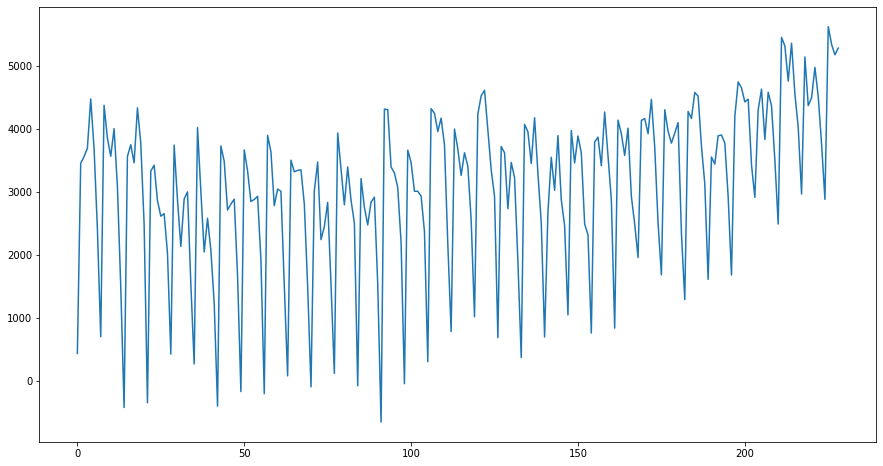

In [70]:
plt.plot(test_predict)

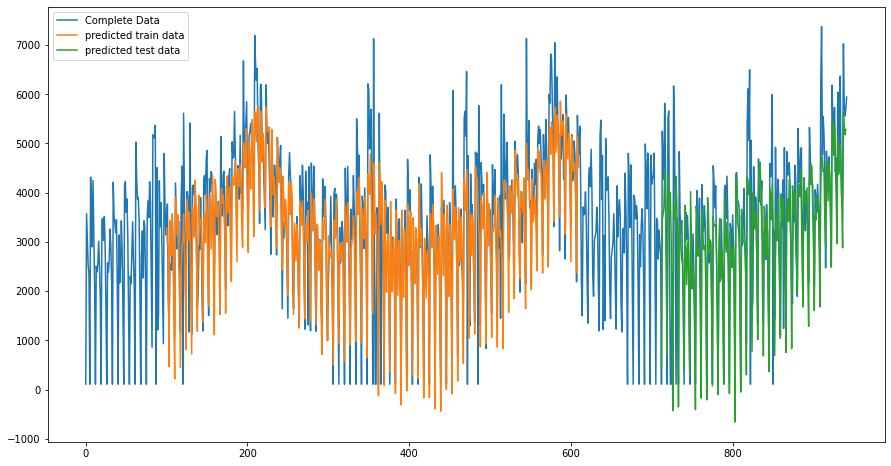

In [71]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1), label='Complete Data')
plt.plot(trainPredictPlot, label='predicted train data')
plt.plot(testPredictPlot, label='predicted test data')
plt.legend()
plt.show()

In [72]:
len(test_data)


330

In [73]:
x_input=test_data[230:].reshape(1,-1)
x_input.shape

(1, 100)

In [74]:
temp_input=list(x_input) # converting to a list
temp_input=temp_input[0].tolist() # storing the values here

In [75]:
temp_input #All my test_data is present here (previous 100 days data)

[0.7511707988980716,
 0.7101928374655647,
 0.6205234159779615,
 0.5569559228650138,
 0.8086776859504132,
 0.7900826446280992,
 0.802892561983471,
 0.9050964187327823,
 0.5,
 0.7151515151515151,
 0.5915977961432507,
 0.83133608815427,
 0.7307162534435262,
 0.7441460055096418,
 0.7865702479338843,
 0.7664600550964187,
 0.6367768595041322,
 0.5684573002754821,
 0.7258953168044077,
 0.7193526170798898,
 0.7856060606060606,
 0.578030303030303,
 0.8307162534435262,
 0.6650137741046832,
 0.6016528925619835,
 0.8251377410468319,
 0.7927685950413224,
 0.7930440771349863,
 0.8098484848484848,
 0.7802341597796143,
 0.6877410468319559,
 0.6395316804407714,
 0.61232782369146,
 0.759228650137741,
 0.7268595041322314,
 0.806129476584022,
 0.787396694214876,
 0.6761019283746557,
 0.6227272727272727,
 0.8577823691460055,
 0.7822314049586776,
 0.7907713498622589,
 0.8288567493112948,
 0.8307162534435262,
 0.7074380165289256,
 0.665564738292011,
 0.7668044077134986,
 0.7443526170798898,
 0.71460055096418

In [76]:
len(temp_input)

100

In [77]:
# demonstrate prediction for next 80 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<80):
    
    if(len(temp_input)>100): # Now if there are greater than 100 elements, start from the 1st index element
        
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1,1,n_steps))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,1, n_steps)) # All the previous 100 days data will be passed here
        yhat = model.predict(x_input, verbose=0) # it will be predicted here
        print(yhat[0]) # I obtain my yhat value
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist()) # Now I'm adding my yhat value inside my final o/p i.e lst_output
        i=i+1                            # Now I'm also adding my yhat value in my previous i/p i.e temp_input
                                         # Now temp_input will have 101 elements.
    

print(lst_output)

[0.7649461]
101
1 day input [0.71019284 0.62052342 0.55695592 0.80867769 0.79008264 0.80289256
 0.90509642 0.5        0.71515152 0.5915978  0.83133609 0.73071625
 0.74414601 0.78657025 0.76646006 0.63677686 0.5684573  0.72589532
 0.71935262 0.78560606 0.5780303  0.83071625 0.66501377 0.60165289
 0.82513774 0.7927686  0.79304408 0.80984848 0.78023416 0.68774105
 0.63953168 0.61232782 0.75922865 0.7268595  0.80612948 0.78739669
 0.67610193 0.62272727 0.85778237 0.7822314  0.79077135 0.82885675
 0.83071625 0.70743802 0.66556474 0.76680441 0.74435262 0.71460055
 0.77045455 0.74483471 0.71115702 0.64318182 0.85909091 0.81646006
 0.78719008 0.77940771 0.77899449 0.6988292  0.63677686 0.77190083
 0.75984848 0.74022039 0.77961433 0.75206612 0.72548209 0.6588843
 0.92320937 1.         0.82073003 0.87451791 0.85020661 0.78946281
 0.66267218 0.82596419 0.7927686  0.77871901 0.81804408 0.78918733
 0.75495868 0.66556474 0.91818182 0.86363636 0.82603306 0.88698347
 0.79772727 0.81639118 0.71707989 0

In [78]:
lst_output

[[0.7649461030960083],
 [0.7211352586746216],
 [0.8748865723609924],
 [0.8179529309272766],
 [0.8464603424072266],
 [0.8536787033081055],
 [0.8375403881072998],
 [0.7425204515457153],
 [0.6882811784744263],
 [0.8516581058502197],
 [0.8466270565986633],
 [0.7882815003395081],
 [0.8402572870254517],
 [0.8213426470756531],
 [0.7376707196235657],
 [0.7237109541893005],
 [0.8384754657745361],
 [0.8259541988372803],
 [0.7594583630561829],
 [0.7958425879478455],
 [0.7939247488975525],
 [0.731632649898529],
 [0.6613779067993164],
 [0.8379486203193665],
 [0.780859649181366],
 [0.7598569393157959],
 [0.8061068654060364],
 [0.7835713624954224],
 [0.7134292125701904],
 [0.6748903393745422],
 [0.8336585164070129],
 [0.8104805946350098],
 [0.7611045837402344],
 [0.8162400126457214],
 [0.7623457312583923],
 [0.6836827993392944],
 [0.6382982134819031],
 [0.7889689803123474],
 [0.7640284299850464],
 [0.7305635809898376],
 [0.7800083756446838],
 [0.746588945388794],
 [0.6793668866157532],
 [0.6479722261

In [79]:
len(lst_output)

80

In [80]:
fnl_output=scaler.inverse_transform(lst_output)

In [81]:
fnl_output

array([[3959.01741695],
       [3322.88395596],
       [5555.35303068],
       [4728.67655706],
       [5142.60417175],
       [5247.41477203],
       [5013.08643532],
       [3633.39695644],
       [2845.84271145],
       [5218.07569695],
       [5145.02486181],
       [4297.84738493],
       [5052.53580761],
       [4777.89523554],
       [3562.97884893],
       [3360.28305483],
       [5026.66376305],
       [4844.85496712],
       [3879.33543158],
       [4407.634377  ],
       [4379.78735399],
       [3475.30607653],
       [2455.20720673],
       [5019.01396704],
       [4190.08210611],
       [3885.12275887],
       [4556.6716857 ],
       [4229.45618343],
       [3210.99216652],
       [2651.40772772],
       [4956.72165823],
       [4620.1782341 ],
       [3903.23855591],
       [4703.80498362],
       [3921.26001787],
       [2779.07424641],
       [2120.09005976],
       [4307.82959414],
       [3945.69280338],
       [3459.78319597],
       [4177.72161436],
       [3692.471

In [82]:
len(fnl_output)

80

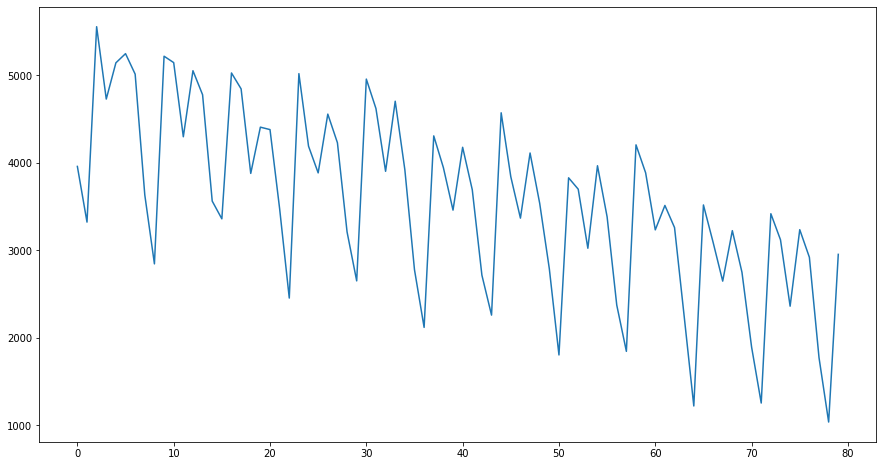

In [83]:
plt.plot(fnl_output)

In [84]:
import matplotlib.pyplot as plt

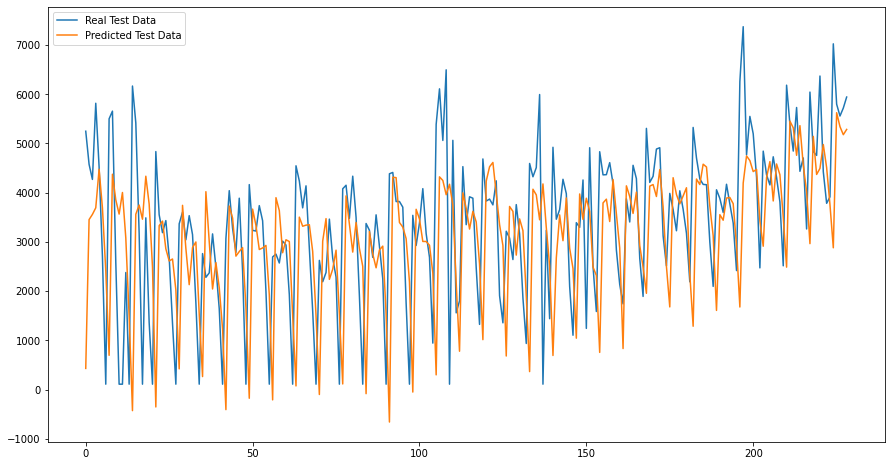

In [85]:
plt.plot(scaler.inverse_transform(df1[713:]),label='Real Test Data')
plt.plot(test_predict, label='Predicted Test Data')
plt.legend()
plt.show()

In [86]:
date = pd.date_range(start='2015/08/01', periods=80, freq='D')
date

DatetimeIndex(['2015-08-01', '2015-08-02', '2015-08-03', '2015-08-04',
               '2015-08-05', '2015-08-06', '2015-08-07', '2015-08-08',
               '2015-08-09', '2015-08-10', '2015-08-11', '2015-08-12',
               '2015-08-13', '2015-08-14', '2015-08-15', '2015-08-16',
               '2015-08-17', '2015-08-18', '2015-08-19', '2015-08-20',
               '2015-08-21', '2015-08-22', '2015-08-23', '2015-08-24',
               '2015-08-25', '2015-08-26', '2015-08-27', '2015-08-28',
               '2015-08-29', '2015-08-30', '2015-08-31', '2015-09-01',
               '2015-09-02', '2015-09-03', '2015-09-04', '2015-09-05',
               '2015-09-06', '2015-09-07', '2015-09-08', '2015-09-09',
               '2015-09-10', '2015-09-11', '2015-09-12', '2015-09-13',
               '2015-09-14', '2015-09-15', '2015-09-16', '2015-09-17',
               '2015-09-18', '2015-09-19', '2015-09-20', '2015-09-21',
               '2015-09-22', '2015-09-23', '2015-09-24', '2015-09-25',
      

In [87]:
ff=pd.DataFrame(fnl_output, columns=['Forecast'])

In [88]:
ff

,Forecast
0,3959.017417
1,3322.883956
2,5555.353031
3,4728.676557
4,5142.604172
...,...
75,3236.373496
76,2920.897085
77,1774.551916
78,1039.014380


In [89]:
ff['Time_Stamp'] = pd.DataFrame(date)

In [90]:
ff

,Forecast,Time_Stamp
0,3959.017417,2015-08-01
1,3322.883956,2015-08-02
2,5555.353031,2015-08-03
3,4728.676557,2015-08-04
4,5142.604172,2015-08-05
...,...,...
75,3236.373496,2015-10-15
76,2920.897085,2015-10-16
77,1774.551916,2015-10-17
78,1039.014380,2015-10-18


In [91]:
ff=ff.set_index('Time_Stamp')

In [92]:
ff

,Forecast
Time_Stamp,
2015-08-01,3959.017417
2015-08-02,3322.883956
2015-08-03,5555.353031
2015-08-04,4728.676557
2015-08-05,5142.604172
...,...
2015-10-15,3236.373496
2015-10-16,2920.897085
2015-10-17,1774.551916


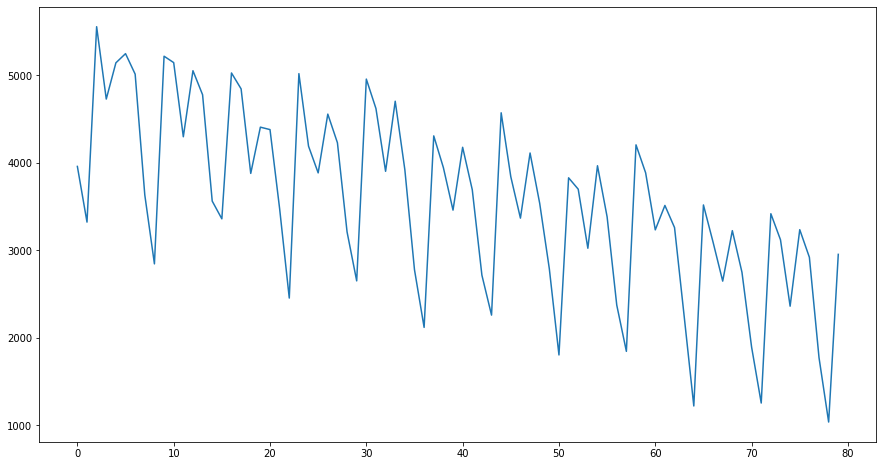

In [93]:
plt.plot(fnl_output)

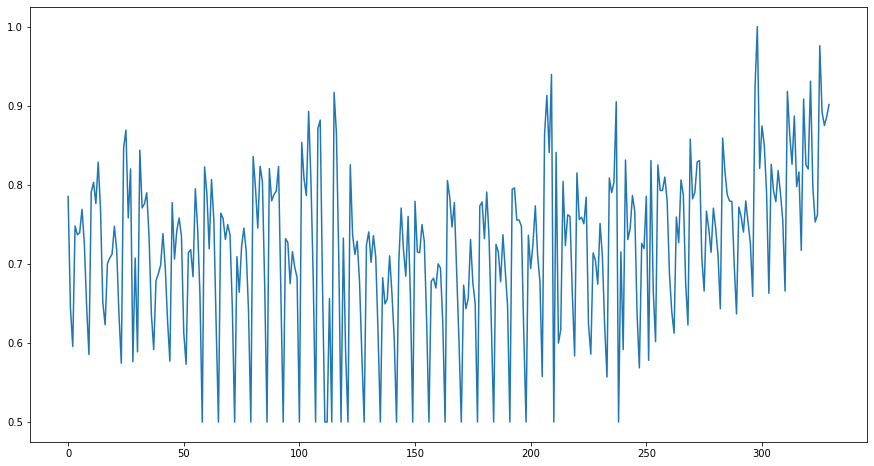

In [94]:
plt.plot(test_data)

In [95]:
day_new1=np.arange(1,331)
day_pred1=np.arange(331,411)

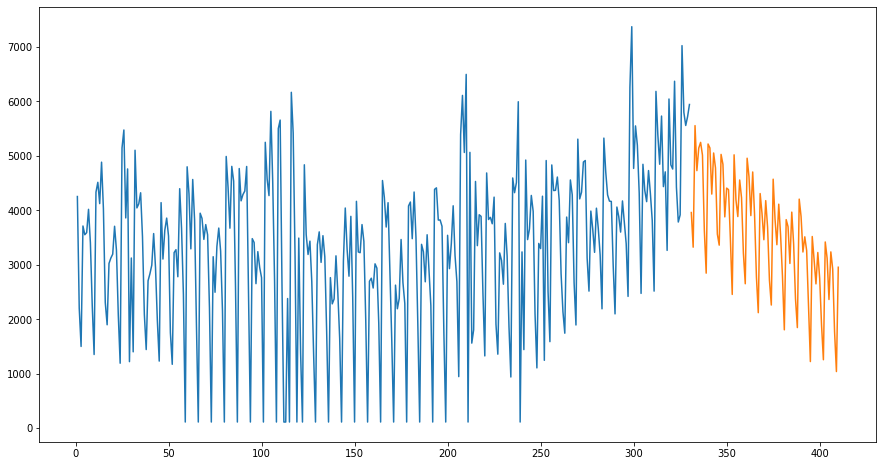

In [96]:
plt.plot(day_new1,scaler.inverse_transform(df1[612:]))
plt.plot(day_pred1,fnl_output)

In [97]:
daynew2=np.arange(1,230)
day3fore=np.arange(230,310)

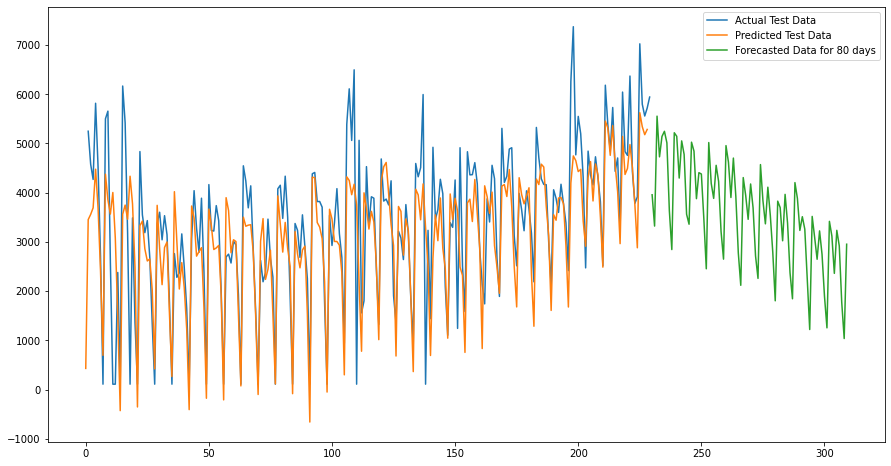

In [98]:
plt.plot(daynew2,scaler.inverse_transform(df1[713:]), label='Actual Test Data')
plt.plot(test_predict,label='Predicted Test Data')
plt.plot(day3fore,fnl_output, label='Forecasted Data for 80 days')
plt.legend()
plt.show()

In [99]:
vv=atr2.iloc[212:292]
vv.head()

,Sales
Date,
2013-08-01,6525
2013-08-02,5025
2013-08-03,4493
2013-08-04,3375
2013-08-05,6155


In [100]:
vv.tail()

,Sales
Date,
2013-10-15,2638
2013-10-16,3052
2013-10-17,3016
2013-10-18,3041
2013-10-19,1760


In [101]:
len(vv)

80

In [102]:
jj=atr2.iloc[577:657]

In [103]:
jj.head()

,Sales
Date,
2014-08-01,5781
2014-08-02,4961
2014-08-03,3312
2014-08-04,7046
2014-08-05,5968


In [104]:
jj.tail()

,Sales
Date,
2014-10-15,2993
2014-10-16,3573
2014-10-17,2949
2014-10-18,1967
2014-10-19,1231


In [105]:
len(jj)

80

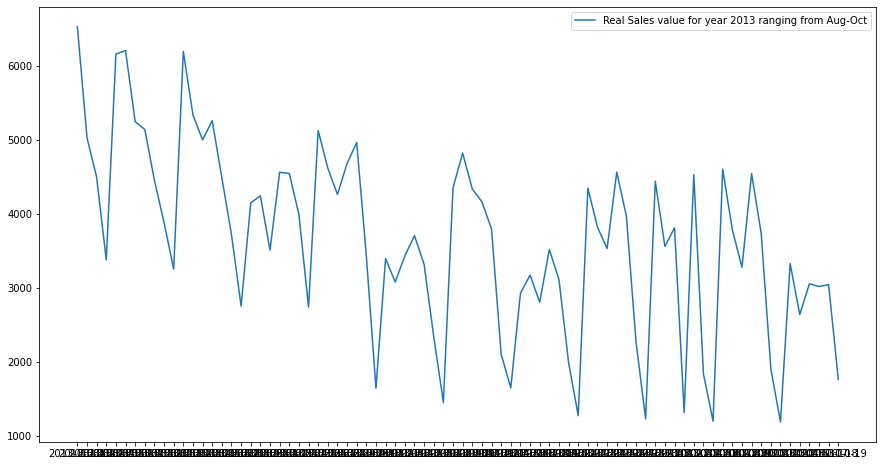

In [106]:
plt.plot(vv['Sales'], label='Real Sales value for year 2013 ranging from Aug-Oct')
plt.legend()
plt.show()

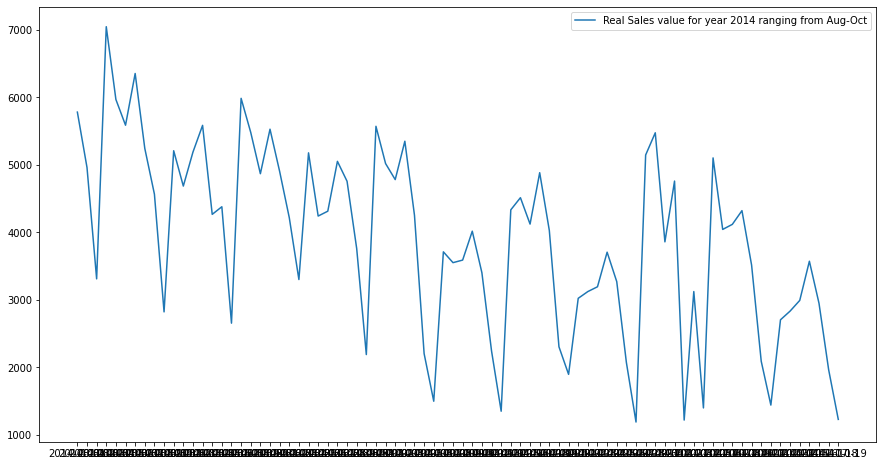

In [107]:
plt.plot(jj['Sales'],label='Real Sales value for year 2014 ranging from Aug-Oct')
plt.legend()
plt.show()

In [108]:
a1=vv.reset_index()['Sales']

In [109]:
a1

0     6525
1     5025
2     4493
3     3375
4     6155
      ... 
75    2638
76    3052
77    3016
78    3041
79    1760
Name: Sales, Length: 80, dtype: int64

In [110]:
len(a1)

80

In [111]:
b1=jj.reset_index()['Sales']

In [112]:
b1

0     5781
1     4961
2     3312
3     7046
4     5968
      ... 
75    2993
76    3573
77    2949
78    1967
79    1231
Name: Sales, Length: 80, dtype: int64

In [113]:
len(b1)

80

In [114]:
len(train_predict)

511

In [115]:
atr2.iloc[101:612]

,Sales
Date,
2013-04-12,3771
2013-04-13,1893
2013-04-14,1241
2013-04-15,2436
2013-04-16,2555
...,...
2014-08-31,2191
2014-09-01,5571
2014-09-02,5019


In [116]:
date1 = pd.date_range(start='2013/04/12', periods=511, freq='D')
date1

DatetimeIndex(['2013-04-12', '2013-04-13', '2013-04-14', '2013-04-15',
               '2013-04-16', '2013-04-17', '2013-04-18', '2013-04-19',
               '2013-04-20', '2013-04-21',
               ...
               '2014-08-26', '2014-08-27', '2014-08-28', '2014-08-29',
               '2014-08-30', '2014-08-31', '2014-09-01', '2014-09-02',
               '2014-09-03', '2014-09-04'],
              dtype='datetime64[ns]', length=511, freq='D')

In [117]:
njc=pd.DataFrame(train_predict, columns=['Predicted Train Data'])

In [118]:
njc

,Predicted Train Data
0,3281.240723
1,2944.267822
2,2878.054199
3,468.351227
4,3431.399658
...,...
506,3814.881104
507,2381.252686
508,5164.759277
509,4775.251465


In [119]:
njc['time_Stamp'] = pd.DataFrame(date1)

In [120]:
njc

,Predicted Train Data,time_Stamp
0,3281.240723,2013-04-12
1,2944.267822,2013-04-13
2,2878.054199,2013-04-14
3,468.351227,2013-04-15
4,3431.399658,2013-04-16
...,...,...
506,3814.881104,2014-08-31
507,2381.252686,2014-09-01
508,5164.759277,2014-09-02
509,4775.251465,2014-09-03


In [121]:
njc=njc.set_index('time_Stamp')

In [122]:
njc

,Predicted Train Data
time_Stamp,
2013-04-12,3281.240723
2013-04-13,2944.267822
2013-04-14,2878.054199
2013-04-15,468.351227
2013-04-16,3431.399658
...,...
2014-08-31,3814.881104
2014-09-01,2381.252686
2014-09-02,5164.759277


In [123]:
njc.iloc[111:191]

,Predicted Train Data
time_Stamp,
2013-08-01,5039.132324
2013-08-02,5613.757812
2013-08-03,5756.888184
2013-08-04,4737.161621
2013-08-05,3637.235352
...,...
2013-10-15,3363.245605
2013-10-16,3294.787598
2013-10-17,2427.251221


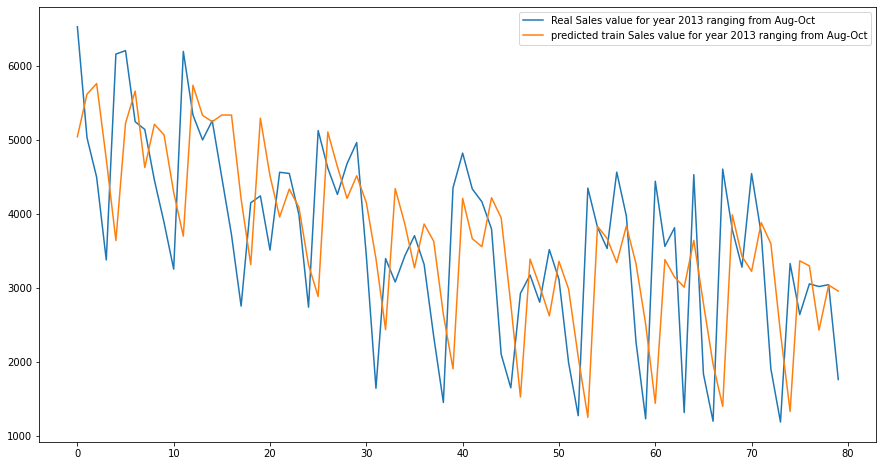

In [124]:
plt.plot(a1,label='Real Sales value for year 2013 ranging from Aug-Oct')
plt.plot(train_predict[111:191], label='predicted train Sales value for year 2013 ranging from Aug-Oct')
plt.legend()
plt.show()

In [125]:
daynewa=np.arange(1,81)
day3foreb=np.arange(81,161)

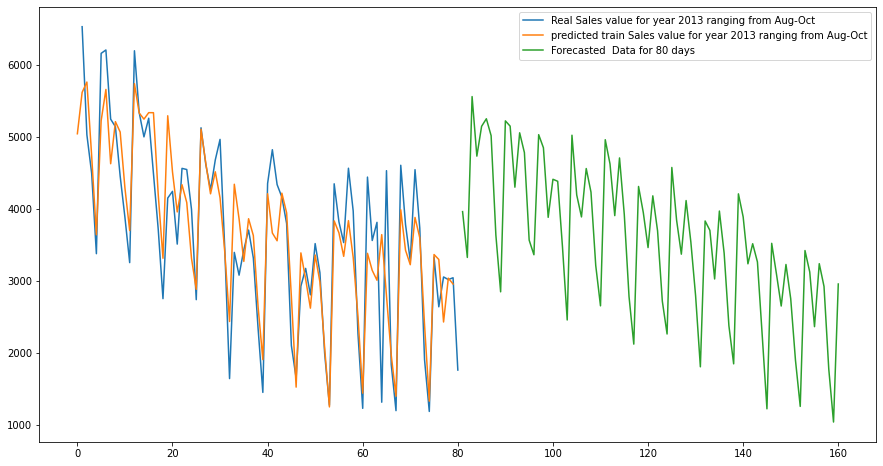

In [126]:
plt.plot(daynewa,a1,label='Real Sales value for year 2013 ranging from Aug-Oct')
plt.plot(train_predict[111:191], label='predicted train Sales value for year 2013 ranging from Aug-Oct')
plt.plot(day3foreb,fnl_output, label='Forecasted  Data for 80 days')
plt.legend()
plt.show()

In [127]:
nn=atr2.iloc[577:612]
nn.head()

,Sales
Date,
2014-08-01,5781
2014-08-02,4961
2014-08-03,3312
2014-08-04,7046
2014-08-05,5968


In [128]:
nn.tail()

,Sales
Date,
2014-08-31,2191
2014-09-01,5571
2014-09-02,5019
2014-09-03,4782
2014-09-04,5350


In [129]:
len(nn)

35

In [130]:
c1=nn.reset_index()['Sales']

In [131]:
c1

0     5781
1     4961
2     3312
3     7046
4     5968
5     5587
6     6353
7     5244
8     4566
9     2823
10    5209
11    4686
12    5189
13    5585
14    4267
15    4380
16    2656
17    5985
18    5480
19    4869
20    5528
21    4903
22    4219
23    3302
24    5178
25    4242
26    4314
27    5052
28    4757
29    3761
30    2191
31    5571
32    5019
33    4782
34    5350
Name: Sales, dtype: int64

In [132]:
len(c1)

35

In [133]:
njc.iloc[476:511]

,Predicted Train Data
time_Stamp,
2014-08-01,5433.466797
2014-08-02,5231.633301
2014-08-03,4747.797852
2014-08-04,3417.381592
2014-08-05,5729.596191
2014-08-06,4821.789551
2014-08-07,5073.482422
2014-08-08,5577.299316
2014-08-09,5345.148438


In [133]:
aar1=np.arange(1,36)
aar2=np.arange(36,71)

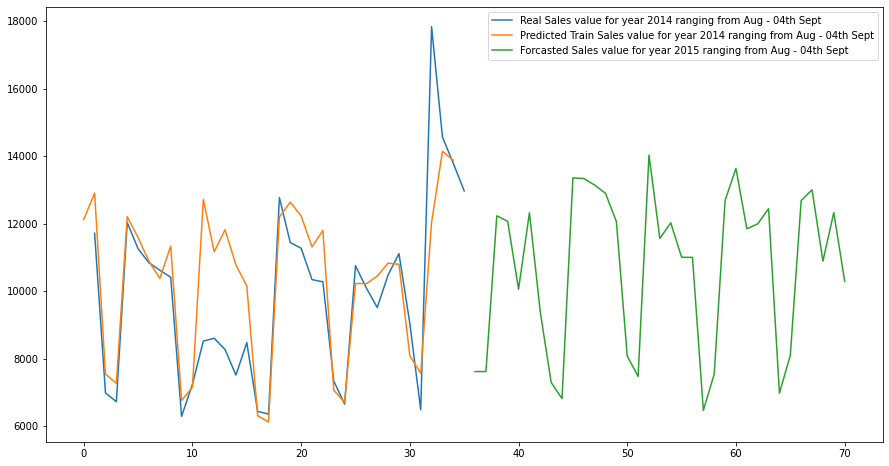

In [134]:
plt.plot(aar1,c1,label='Real Sales value for year 2014 ranging from Aug - 04th Sept')
plt.plot(train_predict[476:511], label='Predicted Train Sales value for year 2014 ranging from Aug - 04th Sept')
plt.plot(aar2,fnl_output[0:35], label='Forcasted Sales value for year 2015 ranging from Aug - 04th Sept')
plt.legend()
plt.show()

In [135]:
import jovian

In [136]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Committed successfully! https://jovian.ai/ismailzain1697/bidirectional-rnn-store-682


'https://jovian.ai/ismailzain1697/bidirectional-rnn-store-682'